## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Netflix. 

### Download NFLX.csv and load it with Pandas

In [42]:
import pandas as pd
import numpy as np
stock = pd.read_csv('NFLX.csv',index_col=0).Close
stock.index = pd.to_datetime(stock.index)
stock

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-28      1.157143
2002-05-29      1.103571
2002-05-30      1.071429
                 ...    
2019-01-15    354.640015
2019-01-16    351.390015
2019-01-17    353.190002
2019-01-18    339.100006
2019-01-22    325.160004
Name: Close, Length: 4195, dtype: float64

### Continue here

Populating the interactive namespace from numpy and matplotlib


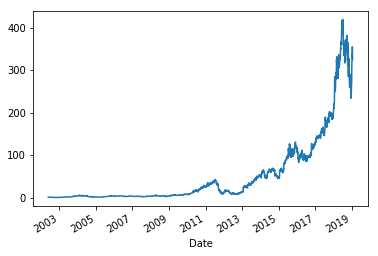

In [12]:
import matplotlib.pyplot as plt
%pylab inline
stock.plot()

Use the Series <i>stock</i> to answer the following questions.

### Question 1


When was the maximum price ever reached? Your code must be a Series with the date and the price. Don't worry about ties.

In [44]:
stock.nlargest(1)

Date
2018-07-09    418.970001
Name: Close, dtype: float64

### Question 2

Find the ten largest <b>one-day % drops</b> (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. 

In [54]:
stock.head(5)

Date
2002-05-23    1.196429
2002-05-24    1.210000
2002-05-28    1.157143
2002-05-29    1.103571
2002-05-30    1.071429
Name: Close, dtype: float64

In [60]:
stock.shift(-1).head()  #the price next day if sold

Date
2002-05-23    1.210000
2002-05-24    1.157143
2002-05-28    1.103571
2002-05-29    1.071429
2002-05-30    1.076429
Name: Close, dtype: float64

In [62]:
nextprice=stock.shift(-1)

In [64]:
changeprice=(nextprice-stock)/stock
changeprice

Date
2002-05-23    0.011343
2002-05-24   -0.043683
2002-05-28   -0.046297
2002-05-29   -0.029125
2002-05-30    0.004667
                ...   
2019-01-15   -0.009164
2019-01-16    0.005122
2019-01-17   -0.039894
2019-01-18   -0.041109
2019-01-22         NaN
Name: Close, Length: 4195, dtype: float64

In [80]:
changeprice.nsmallest(10)

Date
2004-10-14   -0.409065
2011-10-24   -0.348957
2004-07-15   -0.280625
2012-07-24   -0.250155
2008-04-21   -0.237030
2006-07-24   -0.209596
2014-10-15   -0.193696
2011-09-14   -0.189066
2004-04-15   -0.169368
2002-10-15   -0.164935
Name: Close, dtype: float64

In [86]:
changeprice.sort_values().head(10)  # another way - use sort values function to show 

Date
2004-10-14   -0.409065
2011-10-24   -0.348957
2004-07-15   -0.280625
2012-07-24   -0.250155
2008-04-21   -0.237030
2006-07-24   -0.209596
2014-10-15   -0.193696
2011-09-14   -0.189066
2004-04-15   -0.169368
2002-10-15   -0.164935
Name: Close, dtype: float64

### Question 3

Consider this investment strategy: buy whenever the price <b>goes above</b> the 50-day moving average, and then sell after 3 trading sessions. How much profit (in %) would we make on average? On trading day x, we say that the price "goes above" the 50-day moving average if (1) the price was below the moving average on trading day x-1 and (2) the price is above the moving average on trading day x 

In [96]:
moveavg=stock.rolling(50).mean()
moveavg

Date
2002-05-23           NaN
2002-05-24           NaN
2002-05-28           NaN
2002-05-29           NaN
2002-05-30           NaN
                 ...    
2019-01-15    285.596401
2019-01-16    286.276601
2019-01-17    287.158401
2019-01-18    287.631601
2019-01-22    287.918001
Name: Close, Length: 4195, dtype: float64

In [98]:
profit=(stock.shift(-3)-stock)/stock
profit

Date
2002-05-23   -0.077613
2002-05-24   -0.114521
2002-05-28   -0.069753
2002-05-29    0.022654
2002-05-30    0.043333
                ...   
2019-01-15   -0.043819
2019-01-16   -0.074646
2019-01-17         NaN
2019-01-18         NaN
2019-01-22         NaN
Name: Close, Length: 4195, dtype: float64

Because **price "goes above" the 50-day moving average**
if (1) the price was below the moving average on trading day x-1 **and** (2) the price is above the moving average on trading day x

In [131]:
stock1=stock.shift(1) # capture the previous day price
stock1

Date
2002-05-23           NaN
2002-05-24      1.196429
2002-05-28      1.210000
2002-05-29      1.157143
2002-05-30      1.103571
                 ...    
2019-01-15    332.940002
2019-01-16    354.640015
2019-01-17    351.390015
2019-01-18    353.190002
2019-01-22    339.100006
Name: Close, Length: 4195, dtype: float64

In [136]:
profit[(stock>moveavg)&(stock1<moveavg)].mean() 

0.0229166124366224